In [137]:
import os

import argparse
import json

import matplotlib as mpl
import matplotlib.colors as mcl
import matplotlib.pyplot as plt
import numpy as np

import torch
from torch import nn

In [142]:
FULL_PATH = '/mlx/users/zafar.takhirov/repo/ARC-AGI'  # Need this in case of a cluster submission which loses relative path information
DATA_PATH = os.path.join(FULL_PATH, 'third-party', 'ARC-AGI', 'data')
TRAIN_PATH = os.path.join(DATA_PATH, 'training')

# COLORS = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a']
COLORS = [
    '#000',     # black
    '#0074D9',  # blue
    '#FF4136',  # red
    '#2ECC40',  # green
    '#FFDC00',  # yellow
    '#AAAAAA',  # grey
    '#F012BE',  # fuschia
    '#FF851B',  # orange
    '#7FDBFF',  # teal
    '#870C25',  # brown
]

CMAP = mpl.colors.ListedColormap(list(map(mcl.to_rgba, COLORS)))

In [144]:
CMAP.colors

[(0.0, 0.0, 0.0, 1.0),
 (0.0, 0.4549019607843137, 0.8509803921568627, 1.0),
 (1.0, 0.2549019607843137, 0.21176470588235294, 1.0),
 (0.1803921568627451, 0.8, 0.25098039215686274, 1.0),
 (1.0, 0.8627450980392157, 0.0, 1.0),
 (0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 1.0),
 (0.9411764705882353, 0.07058823529411765, 0.7450980392156863, 1.0),
 (1.0, 0.5215686274509804, 0.10588235294117647, 1.0),
 (0.4980392156862745, 0.8588235294117647, 1.0, 1.0),
 (0.5294117647058824, 0.047058823529411764, 0.1450980392156863, 1.0)]

In [150]:
def draw_grid(data, ax=None):
    '''Visualizes a single item'''
    if ax is None:
        ax = plt.gca()
    data_shape = np.shape(data)
    ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
    ax.grid(axis='both', color='w', linewidth=0.5)
    ax.imshow(data, cmap=CMAP, vmin=0, vmax=CMAP.N)
    ax.set_xticks(np.arange(0.5, data_shape[1], 1))
    ax.set_yticks(np.arange(0.5, data_shape[0], 1))
    return ax

def visualize(data, ax=None):
    '''Visualizes the ARC task

    Data should have the following structure:
        {
            'train': [  # Pattern to understand the task
                {'input': [...], 'output': [...]},
                {'input': [...], 'output': [...]},
                ...
            ],
            'test': [   # Pattern to predict
                {'input': [...], 'output': [...]},
                {'input': [...], 'output': [...]},
                ...
            ]
        }
    '''
    num_train = len(data['train'])
    num_test = len(data['test'])
    
    num_rows = max(num_train, num_test)
    num_cols = 2 * ((num_train > 0) + (num_test > 0))
    
    fig = None
    if ax is None:
        fig, ax = plt.subplots(num_rows, num_cols,
                               figsize=(2 * num_cols, 2 * num_rows))
    if fig is None:
        fig = plt.gcf()
    
    for a in ax.flat:
        a.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
    
    for idx in range(num_train):
        draw_grid(data['train'][idx]['input'], ax[idx, 0])
        draw_grid(data['train'][idx]['output'], ax[idx, 1])
    for idx in range(num_test):
        draw_grid(data['test'][idx]['input'], ax[idx, 2])
        draw_grid(data['test'][idx]['output'], ax[idx, 3])

    fig.tight_layout()

    return fig, ax

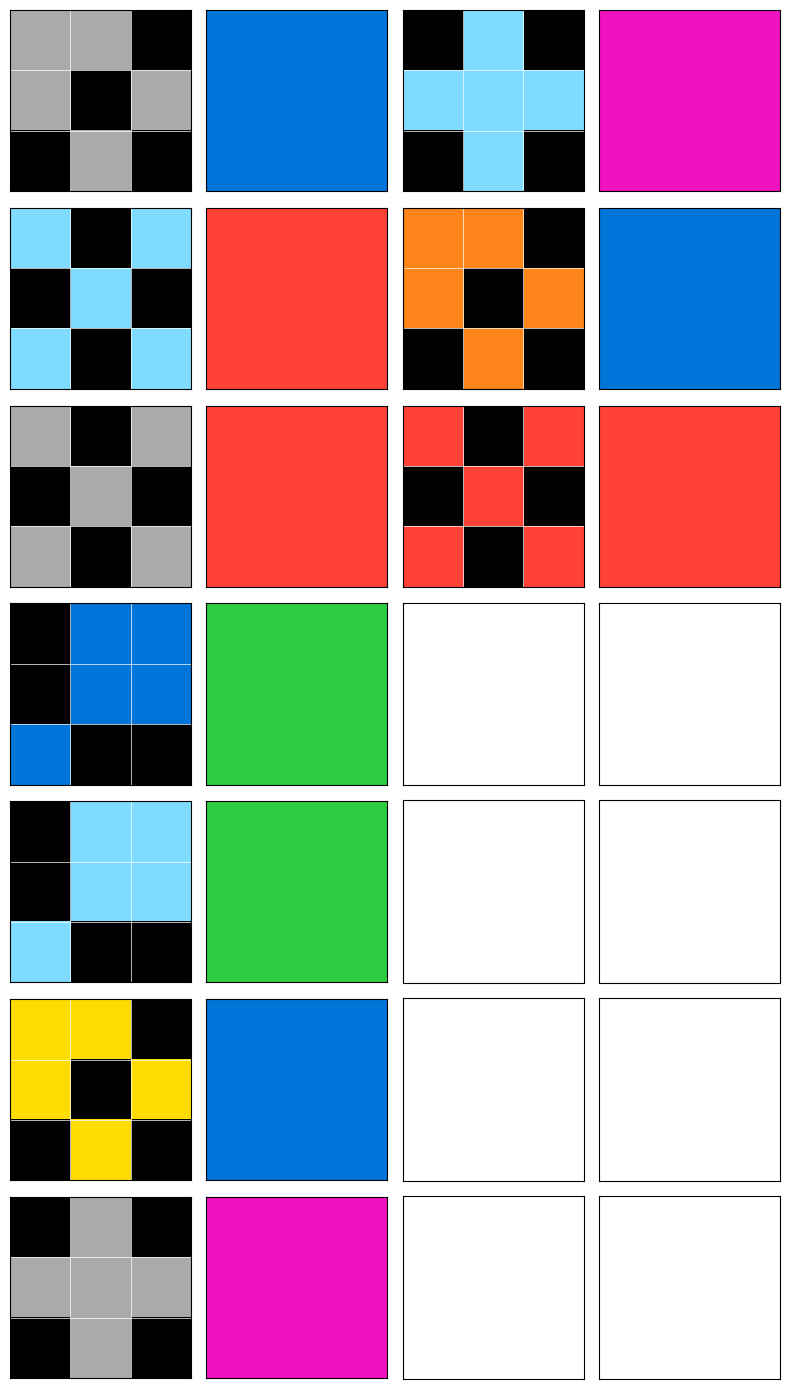

In [155]:
all_files = os.listdir(TRAIN_PATH)
file_num = 59

with open(os.path.join(TRAIN_PATH, all_files[file_num])) as f:
    data = json.load(f)

fig, ax = visualize(data)

In [152]:
data

{'train': [{'input': [[5, 5, 0], [5, 0, 5], [0, 5, 0]], 'output': [[1]]},
  {'input': [[8, 0, 8], [0, 8, 0], [8, 0, 8]], 'output': [[2]]},
  {'input': [[5, 0, 5], [0, 5, 0], [5, 0, 5]], 'output': [[2]]},
  {'input': [[0, 1, 1], [0, 1, 1], [1, 0, 0]], 'output': [[3]]},
  {'input': [[0, 8, 8], [0, 8, 8], [8, 0, 0]], 'output': [[3]]},
  {'input': [[4, 4, 0], [4, 0, 4], [0, 4, 0]], 'output': [[1]]},
  {'input': [[0, 5, 0], [5, 5, 5], [0, 5, 0]], 'output': [[6]]}],
 'test': [{'input': [[0, 8, 0], [8, 8, 8], [0, 8, 0]], 'output': [[6]]},
  {'input': [[7, 7, 0], [7, 0, 7], [0, 7, 0]], 'output': [[1]]},
  {'input': [[2, 0, 2], [0, 2, 0], [2, 0, 2]], 'output': [[2]]}]}

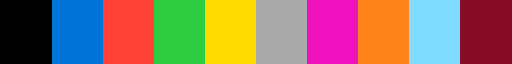

In [153]:
CMAP

In [79]:
question

{'input': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 8, 8, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 8, 8, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 4, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 2, 4, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
 'output': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 8, 8, 0, 0, 4, 4, 0],
  [0, 0, 0, 0, 0, 0, 0, 8, 8, 0, 0, 4, 4, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 4, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 6, 6, 0],
  [0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 6, 6, 0],
  [0, 0, 0, 0,

In [118]:
max_num_rows = 0
max_num_cols = 0
max_num_examples = 0
idx_max_examples = None
idx_max_test_examples = None
max_test_examples = 0

for idx, file in enumerate(all_files):
    with open(os.path.join(TRAIN_PATH, file)) as f:
        data = json.load(f)
    for target in ('train', 'test'):
        for example in data[target]:
            # Input
            rows, cols = np.shape(example['input'])
            max_num_rows = max(max_num_rows, rows)
            max_num_cols = max(max_num_cols, cols)
            # Output
            rows, cols = np.shape(example['output'])
            max_num_rows = max(max_num_rows, rows)
            max_num_cols = max(max_num_cols, cols)
    if len(data['train']) > max_num_examples:
        max_num_examples = len(data['train'])
        idx_max_examples = idx
    if len(data['test']) > max_test_examples:
        max_test_examples = len(data['test'])
        idx_max_test_examples = idx
    max_test_examples = max(max_test_examples, len(data['test']))

In [119]:
max_num_rows, max_num_cols, max_num_examples, idx_max_examples, max_test_examples, idx_max_test_examples

(30, 30, 10, 204, 3, 59)

In [113]:
list(set(np.unique(example['input'])) | (set([1,9])))

[0, 1, 2, 3, 4, 8, 9]

In [ ]:
class ImageTokenizer:
    def __init__(self, max_rows, max_cols, max_examples)
        self.max_rows = max_rows
        self.max_cols = max_cols
        # self.max_examples = max_examples
        # self.normalize = normalize
        
        self._word_tokens = np.arange(10)
        self._skip_reserve = 10
        self._control_tokens = {}
        
        self.append_token('<UNK>')
        self.append_token('<MASK>')
        self.append_token('<SKIP>')
    
        # self.UNK = '<UNK>'
        # self.MASK = '<MASK>'
        # self.SKIP = '<SKIP>'
    
    def append_token(self, name):
        if name in self._control_tokens:
            raise ValueError(f'{name} is already set')
        next_token = len(self._word_tokens) + self._skip_reserve + len(self._control_tokens)
        self.set_token(name, next_token)
        
    def set_token(self, name, token):
        self._control_tokens[name] = token
    
    @property
    def UNK(self):
        return self._control_tokens.get('<UNK>', None)
    @UNK.setter
    def UNK(self, token
    
        
            